# Simulation 1
See README.md for a short description.

### Importing libraries

In [1]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

import server as srv
import agent as agn

### Defining the number of ports

In [2]:
nports = 4

### Creating the agent and setting the learning options 

In [3]:
agt = agn.Agent(nports)
agt.set_learning_options(exploration=0.2, 
                         learningrate=0.1, 
                         discount=0.9, 
                         scanprobability=0.1)

## Simulation 1.1

We run a little number of episodes ($50$). Notice that for each episode, (i) we randomly select a new vulnerable port; (ii) we create a new server; (iii) we reset the environment of the agent; (iv) we run the episode; (v) we print the state-action table.

In [4]:
nepisodes = 50
for _ in range(nepisodes):
    
    vulnport = np.random.randint(1,nports+1)
    env = srv.Server(nports,vulnport)
    agt.reset(env)
    
    agt.run_episode()
    print(agt.Q)


Game reset
Discovered open port(s)
Discovered open port(s)
Nothing happened
Flag captured
[[ 0.99  1.    1.    1.    1.  ]
 [ 1.    1.    1.    1.    1.  ]
 [ 0.99  0.89 10.99  1.    1.  ]
 [ 1.    1.    1.    1.    1.  ]
 [ 1.    1.    1.    1.    1.  ]]

Game reset
Nothing happened
Nothing happened
Flag captured
[[ 0.99  0.89  0.89 10.99  1.  ]
 [ 1.    1.    1.    1.    1.  ]
 [ 0.99  0.89 10.99  1.    1.  ]
 [ 1.    1.    1.    1.    1.  ]
 [ 1.    1.    1.    1.    1.  ]]

Game reset
Nothing happened
Flag captured
[[ 0.99    0.89   11.7901 10.99    1.7891]
 [ 1.      1.      1.      1.      1.    ]
 [ 0.99    0.89   10.99    1.      1.    ]
 [ 1.      1.      1.      1.      1.    ]
 [ 1.      1.      1.      1.      1.    ]]

Game reset
Flag captured
[[ 0.99      0.89     21.672199 10.99      1.7891  ]
 [ 1.        1.        1.        1.        1.      ]
 [ 0.99      0.89     10.99      1.        1.      ]
 [ 1.        1.        1.        1.        1.      ]
 [ 1.        1.     

At the end of 50 episodes we notice that the Q-table is slowly taking a diagonal form. However, given the limited number of episodes and the limited number of actions, the agents still thinks it pays off pretty well just to guess from the beginning the vulnerable port.

## Simulation 1.2
We now increase the number of episodes to 500.

In [5]:
nepisodes = 500
for _ in range(nepisodes):
    
    vulnport = np.random.randint(1,nports+1)
    env = srv.Server(nports,vulnport)
    agt.reset(env)
    
    agt.run_episode()
    print(agt.Q)


Game reset
Flag captured
[[ 6.48381383 47.24707565 74.2513979  63.51479345 54.14449779]
 [ 0.99       30.671299    1.          1.          1.        ]
 [ 0.99        2.41019    20.8801      1.          1.        ]
 [ 0.99        0.89        0.89       30.671299    1.        ]
 [ 0.99        0.89        0.89        0.89       20.8801    ]]

Game reset
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Flag captured
[[ 6.48381383 49.78016443 63.19304915 72.87964551 55.16177957]
 [ 0.99       30.671299    1.          1.          1.        ]
 [ 0.99        2.41019    20.8801      1.          1.        ]
 [ 0.99        0.89        0.89       30.671299    1.        ]
 [ 0.99        0.89        0.89        0.89       20.8801    ]]

Game reset
Nothing happene

Nothing happened
Nothing happened
Nothing happened
Nothing happened
Flag captured
[[ 22.25704644  91.51012249 100.68366492  90.95771305  90.6911581 ]
 [  0.99        49.96094015   1.           1.           1.        ]
 [  0.99         2.41019     49.96094015   1.           1.        ]
 [  0.99         0.89         0.89        30.671299     1.        ]
 [  3.65141691   0.89         0.89         0.89        59.46133075]]

Game reset
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Flag captured
[[ 22.25704644 100.59502126  91.11143692  90.95771305  90.48395683]
 [  0.99        49.96094015   1.           1.           1.        ]
 [  0.99         2.41019     49.96094015   1.           1.        ]
 [  0.99         0.89         0.89        30.671299     1.        ]
 [  3.65141691   0.89         0.89         0.89        59.46133075]]

Game reset
Nothing happened
Nothing hap

 [  3.65141691   0.89         0.89         0.89        87.39626976]]

Game reset
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Discovered open port(s)
Nothing happened
Flag captured
[[ 54.03647942  93.41787596  97.17588312  97.44285464 115.42929803]
 [  0.99        87.39626976   6.99800457   1.           5.29648461]
 [  0.99         2.41019     96.52230707   1.           1.        ]
 [  0.99         0.89         6.89900457  78.17805027   1.        ]
 [  3.65141691   0.89         0.89         0.89        87.39626976]]

Game reset
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Flag captured
[[ 54.03647942  94.02944139  97.17588312 107.64238867 110.48688323]
 [  0.99        87.39626976   6.99800457   1.           5.29648461]
 [  0.99         2.41019     96.52230707   1.           1.        ]
 [  0.99         0.89         6.89900457  78.17805027   1.        ]
 [  3.65141691   0.89         0.89    

 [  3.65141691   0.89         0.89         0.89        96.52230707]]

Game reset
Flag captured
[[ 64.3352185  108.82532632 104.21005316 120.73896121 104.22671212]
 [  0.99        96.52230707   6.99800457   1.           5.29648461]
 [  0.99         2.41019     96.52230707   1.           1.        ]
 [  0.99         0.89         6.89900457 105.557084     1.        ]
 [  3.65141691   0.89         0.89         0.89        96.52230707]]

Game reset
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Flag captured
[[ 64.3352185  117.73707306 104.21005316 108.23797303 104.10690011]
 [  0.99        96.52230707   6.99800457   1.           5.29648461]
 [  0.99         2.41019     96.52230707   1.           1.        ]
 [  0.99         0.89         6.89900457 105.557084     1.        ]
 [  3.65141691   0.89         0.89         0.89        96.52230707]]

Game rese

 [  3.65141691  11.00613618   0.89         0.89       123.35649802]]

Game reset
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Flag captured
[[ 88.785267   123.06908227 129.56007697 128.71526944 135.59228808]
 [  0.99       132.12293304   6.99800457   1.           5.29648461]
 [  0.99         2.41019    123.35649802  11.10513618   1.        ]
 [  0.99         0.89         6.89900457 123.35649802   1.        ]
 [  3.65141691  11.00613618   0.89         0.89       123.35649802]]

Game reset
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Flag captured
[[ 88.785267   132.42258097 129.56007697 128.71526944 128.4568173 ]
 [  0.99       132.12293304   6.99800457   1.           5.29648461]
 [  0.99         2.41019    123.35649802  11.10513618   1.        ]
 [  0.99         0.89         6.89900457 123.35649802   1.        ]
 [  3.65141691  11.00613618   0.89         0.89       123.35649802]]

Game reset
Nothing happened
Nothing happene

 [  3.65141691  11.00613618   0.89         0.89       140.80170371]]

Game reset
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Flag captured
[[106.37691116 134.09259294 133.85742586 141.31427045 134.3592382 ]
 [  0.99       140.80170371   6.99800457   1.           5.29648461]
 [  0.99         2.41019    157.89974981  11.10513618  11.90208482]
 [  0.99         0.89         6.89900457 132.12293304   1.        ]
 [  3.65141691  11.00613618   0.89         0.89       140.80170371]]

Game reset
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Flag captured
[[106.37691116 142.75166701 133.85742586 133.89836561 132.91564582]
 [  0.99       140.80170371   6.99800457   1.           5.29648461]
 [  0.99         2.41019    157.89974981  11.10513618  11.90208482]
 [  0.99         0.89         6.89900457 132.12293304   1.        ]
 [  3.65141691  11.00613618 

Now the Q-table has clearly a diagonal shape. Playing long enough, the agent has learned that the best strategy is to first scan the ports and then directly attack the vulnerable one.

## Simulation 1.3
We now run the agent using a larger set of actions.

In [6]:
nports = 64

agt = agn.Agent(nports)
agt.set_learning_options(exploration=0.2, 
                         learningrate=0.1, 
                         discount=0.9, 
                         scanprobability=0.1)
steps = []
Q_diag = []
Q_ndiag = []

nepisodes = 1000
for _ in range(nepisodes):
    
    vulnport = np.random.randint(1,nports+1)
    env = srv.Server(nports,vulnport)
    agt.reset(env)
    
    agt.run_episode()
    steps.append(agt.steps)
    Q_diag.append(np.sum(np.diag(agt.Q)))
    Q_ndiag.append(np.sum(agt.Q))


Game reset
Discovered open port(s)
Discovered open port(s)
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Discovered open port(s)
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Flag captured

Game reset
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothin


Game reset
Discovered open port(s)
Nothing happened
Discovered open port(s)
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Flag captured

Game reset
Discovered open port(s)
Discovered open port(s)
Nothing happened
Nothing happened
Discovered open port(s)
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Discovered open port(s)
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
No


Game reset
Discovered open port(s)
Flag captured

Game reset
Discovered open port(s)
Discovered open port(s)
Nothing happened
Flag captured

Game reset
Discovered open port(s)
Flag captured

Game reset
Discovered open port(s)
Discovered open port(s)
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Discovered open port(s)
Nothing happened
Nothing happened
Flag captured

Game reset
Discovered open port(s)
Discovered open port(s)
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothing happened
Nothi


Game reset
Discovered open port(s)
Flag captured

Game reset
Discovered open port(s)
Flag captured

Game reset
Discovered open port(s)
Flag captured

Game reset
Discovered open port(s)
Flag captured

Game reset
Nothing happened
Discovered open port(s)
Flag captured

Game reset
Discovered open port(s)
Flag captured

Game reset
Discovered open port(s)
Flag captured

Game reset
Discovered open port(s)
Flag captured

Game reset
Discovered open port(s)
Flag captured

Game reset
Discovered open port(s)
Flag captured

Game reset
Discovered open port(s)
Nothing happened
Flag captured

Game reset
Discovered open port(s)
Flag captured

Game reset
Discovered open port(s)
Flag captured

Game reset
Discovered open port(s)
Flag captured

Game reset
Discovered open port(s)
Flag captured

Game reset
Discovered open port(s)
Flag captured

Game reset
Discovered open port(s)
Flag captured

Game reset
Nothing happened
Discovered open port(s)
Flag captured

Game reset
Discovered open port(s)
Nothing happe


Game reset
Discovered open port(s)
Flag captured

Game reset
Discovered open port(s)
Flag captured

Game reset
Nothing happened
Discovered open port(s)
Flag captured

Game reset
Discovered open port(s)
Flag captured

Game reset
Discovered open port(s)
Flag captured

Game reset
Discovered open port(s)
Flag captured

Game reset
Discovered open port(s)
Flag captured

Game reset
Nothing happened
Discovered open port(s)
Flag captured

Game reset
Nothing happened
Nothing happened
Discovered open port(s)
Flag captured

Game reset
Discovered open port(s)
Flag captured

Game reset
Nothing happened
Discovered open port(s)
Flag captured

Game reset
Discovered open port(s)
Nothing happened
Flag captured

Game reset
Discovered open port(s)
Flag captured

Game reset
Discovered open port(s)
Nothing happened
Flag captured

Game reset
Discovered open port(s)
Flag captured

Game reset
Discovered open port(s)
Flag captured

Game reset
Discovered open port(s)
Flag captured

Game reset
Discovered open por

Reading the Q-table is now unfeasible, so we plot the matrix.

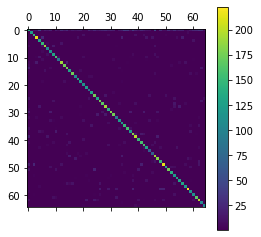

In [7]:
plt.matshow(agt.Q)
plt.colorbar()

The matrix indeed confirm that the agent learned the optimal strategy of scanning and attacking.

We also evaluate the speed and the convergence process of learning assessing how the ratio between the sum of the value on the diagonal of Q and the sum of all values of Q change.

Text(0, 0.5, 'Ratio diagonal/matrix')

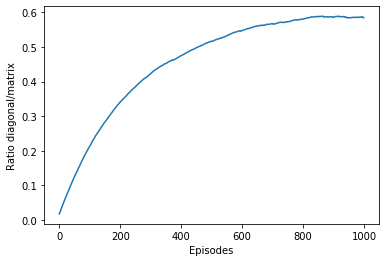

In [8]:
l = np.array(Q_diag) / np.array(Q_ndiag)
plt.plot(range(nepisodes),l)
plt.xlabel('Episodes')
plt.ylabel('Ratio diagonal/matrix')

Finally, we record the number of steps as a function of the number of episodes.

Text(0, 0.5, 'Number of steps')

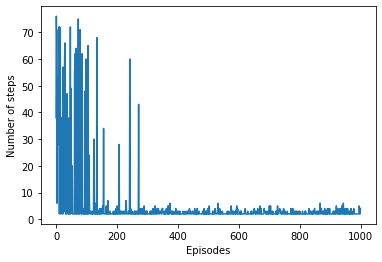

In [9]:
plt.plot(range(nepisodes),steps)
plt.xlabel('Episodes')
plt.ylabel('Number of steps')

## Simulation 1.4
We re-run simulation 1.3 for $100$ times in order to collect statistics

In [10]:
nports = 64
ntrials = 100

steps = np.zeros((ntrials,nepisodes))
Q_diag = np.zeros((ntrials,nepisodes))
Q_ndiag = np.zeros((ntrials,nepisodes))
Qs = np.zeros((ntrials,nports+1,nports+1))

for t in tqdm(range(ntrials)):

    agt = agn.Agent(nports,verbose=False)
    agt.set_learning_options(exploration=0.2, 
                             learningrate=0.1, 
                             discount=0.9, 
                             scanprobability=0.1)

    nepisodes = 1000
    for e in range(nepisodes):

        vulnport = np.random.randint(1,nports+1)
        env = srv.Server(nports,vulnport)
        agt.reset(env)

        agt.run_episode()
        
        steps[t,e] = agt.steps
        Q_diag[t,e] = np.sum(np.diag(agt.Q))
        Q_ndiag[t,e] = np.sum(agt.Q)
        Qs[t,:,:] = agt.Q

100%|██████████| 100/100 [00:10<00:00,  9.63it/s]


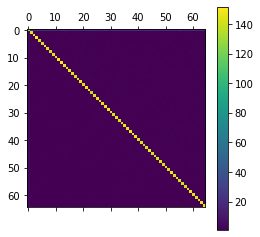

In [11]:
plt.matshow(np.mean(Qs,axis=0))
plt.colorbar()

Text(0, 0.5, 'Ratio diagonal/matrix')

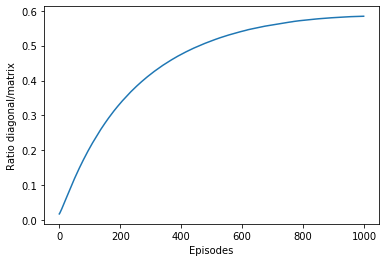

In [12]:
l = np.mean(Q_diag,axis=0) / np.mean(Q_ndiag,axis=0)
plt.plot(range(nepisodes),l)
plt.xlabel('Episodes')
plt.ylabel('Ratio diagonal/matrix')

Text(0, 0.5, 'Number of steps')

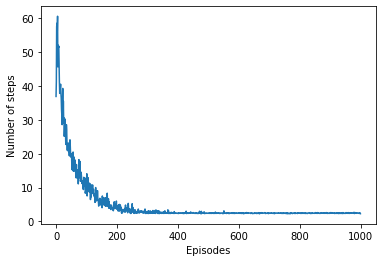

In [13]:
plt.plot(range(nepisodes),np.mean(steps,axis=0))
plt.xlabel('Episodes')
plt.ylabel('Number of steps')

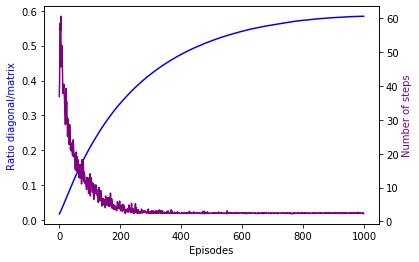

In [24]:
_,ax1 = plt.subplots()
ax1.plot(range(nepisodes),l,c='blue')

ax1.set_xlabel('Episodes')
ax1.set_ylabel('Ratio diagonal/matrix',c='blue')

ax2 = ax1.twinx()
ax2.plot(range(nepisodes),np.mean(steps,axis=0),c='purple')
ax2.set_ylabel('Number of steps',c='purple')

plt.savefig('simul1_plots')